In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/pro/res_apart_S6.csv')

In [ ]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
df.description.str.contains('super built up').sum()

5343

In [ ]:
df[df.description.str.contains('super built up')].sample(2)

,Unnamed: 0.1,Unnamed: 0,preference,description,city,locality,prop_name,own_type,#bedroom,#balcony,furnish,facing,possesion_age,floor_num,#floors,area_in_sqft,price_per_sqft,price_in_lakh,latitude,longitude,total_landmark_count,connectivity,hospital+pharmacy,religious_places,education,banks,shoppings,office_complexes,luxury_score,area_room_ratio
21117,21117,21141,S,"My home avatar is one of the most popular destination for buying apartments/ flats in puppalaguda, hyderabad. You too can be a part of this society by purchasing this 3 bhk flat here. Constructed on a super built up area of 1834 sq.Ft., the flat comprises 3 bedroom(s), 3 bathrooms and 1 balcony. The property is located on the 12th floor of a 31 floors tall building. An added advantage of this 1-5 years old flat is that it is available for immediate possession as the project is already ready to move.\n Additional details :\n\nFull power backup is available.\nThe society has dedicated security guards for every tower.",Hyderabad,Puppalaguda,My Home Avatar,Freehold,3.0,1.0,UnFurnished,East,1-5 Year Old Property,15,21,1680,12000,104.0,17.460991,78.353208,11.00,3.00,1.00,0.00,2.00,0.00,1.0,1.00,51.0,723.333333
15547,15547,15560,S,"New booking..\nThis 2 bhk apartment is available for sale in a and s apartment (New booking), one of the most prominent projects for flats in hridaypur, kolkata north. The flat occupies a super built up area of 799 sq.Ft. That consists of 2 bedrooms, 2 bathrooms and 1 balcony. The residential building has 3 floors in total and the flat for sale is located on the 1st floor. This is a ready to move project and the property is 1-5 years old.",Kolkata North,Hridaypur,A AND S APARTMENT (New Booking),Freehold,3.0,1.0,UnFurnished,South-East,1-5 Year Old Property,1,4,1972,3793,210.0,88.354690,22.536025,25.86,1.72,9.09,2.48,0.65,1.97,0.4,0.37,76.0,334.000000


In [ ]:
df.iloc[:,21:28].sample(5)

,connectivity,hospital+pharmacy,religious_places,education,banks,shoppings,office_complexes
3593,0.0,23.0,1.0,0.0,2.0,0.0,2.0
3591,4.0,0.0,0.0,2.0,0.0,1.0,0.0
15178,3.0,18.0,10.0,0.0,3.0,0.0,0.0
5207,2.0,1.0,0.0,2.0,0.0,1.0,0.0
5961,2.0,1.0,0.0,2.0,0.0,1.0,0.0


In [ ]:
temp = df.iloc[:,21:28]

In [ ]:
temp['connectivity'] = temp['connectivity'].apply(lambda x: 0 if x == 0 else 1)
temp['hospital+pharmacy'] = temp['hospital+pharmacy'].apply(lambda x: 0 if x == 0 else 1)
temp['religious_places'] = temp['religious_places'].apply(lambda x: 0 if x == 0 else 1)
temp['education'] = temp['education'].apply(lambda x: 0 if x == 0 else 1)
temp['education'] = temp['education'].apply(lambda x: 0 if x == 0 else 1)
temp['shoppings'] = temp['shoppings'].apply(lambda x: 0 if x == 0 else 1)
temp['office_complexes'] = temp['office_complexes'].apply(lambda x: 0 if x == 0 else 1)

In [ ]:
temp.sample()

,connectivity,hospital+pharmacy,religious_places,education,banks,shoppings,office_complexes
17871,1,1,1,0,7.0,0,1


In [ ]:
df.update(temp)

In [ ]:
df = df[df.city == 'Gurgaon']

In [ ]:
train_df = df.drop(columns=['prop_name','price_per_sqft','Unnamed: 0','Unnamed: 0.1','latitude','longitude','city'])

In [ ]:
train_df.sample(1)

,preference,description,locality,own_type,#bedroom,#balcony,furnish,facing,possesion_age,floor_num,#floors,area_in_sqft,price_in_lakh,total_landmark_count,connectivity,hospital+pharmacy,religious_places,education,banks,shoppings,office_complexes,luxury_score,area_room_ratio
5212,S,"This beautiful 1 bhk flat in sector 107 gurgaon is situated in signature global solera, one of the popular residential society in gurgaon. The flat is over 350 sq.Ft. Super built up area and comes with 1 bedroom(s), 1 bathroom and 2 balconies. The property is located on the 1st floor of a 4 floors tall building. An added advantage of this 1-5 years old flat is that it is available for immediate possession as the project is already ready to move.",Sector 107,Freehold,3.0,4.0,UnFurnished,North-East,1-5 Year Old Property,6,14,1845,149.0,11.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,51.0,277.0


<Axes: >

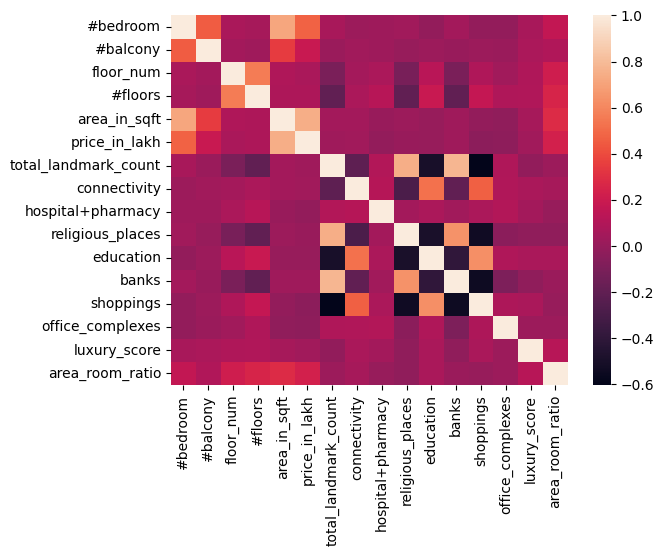

In [ ]:
sns.heatmap(train_df.corr(numeric_only=bool))

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6559 entries, 0 to 6558
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   preference            6559 non-null   object 
 1   description           6559 non-null   object 
 2   locality              6559 non-null   object 
 3   own_type              6559 non-null   object 
 4   #bedroom              6559 non-null   float64
 5   #balcony              6559 non-null   float64
 6   furnish               6559 non-null   object 
 7   facing                6559 non-null   object 
 8   possesion_age         6559 non-null   object 
 9   floor_num             6559 non-null   int64  
 10  #floors               6559 non-null   int64  
 11  area_in_sqft          6559 non-null   int64  
 12  price_in_lakh         6559 non-null   float64
 13  total_landmark_count  6559 non-null   float64
 14  connectivity          6559 non-null   float64
 15  hospital+pharmacy     6559

In [ ]:
train_df.drop(columns=['preference','description'],inplace=True)

In [ ]:
train_df.furnish.value_counts()

furnish
SemiFurnished    4901
UnFurnished      1285
Furnished         373
Name: count, dtype: int64

In [ ]:
train_df.facing = train_df.facing.astype('category')

In [ ]:
train_df.corr(numeric_only=bool)['price_in_lakh'].sort_values(ascending=False)

price_in_lakh           1.000000
area_in_sqft            0.743736
#bedroom                0.469890
area_room_ratio         0.235278
#balcony                0.187692
#floors                 0.080675
floor_num               0.067859
luxury_score            0.039895
connectivity            0.038621
total_landmark_count    0.035208
banks                   0.029751
religious_places        0.009286
education               0.000505
hospital+pharmacy      -0.009194
office_complexes       -0.030992
shoppings              -0.038555
Name: price_in_lakh, dtype: float64

In [ ]:
# cols in question

# numerical -> hospital+pharmacy, total_landmark_count, banks, religious_places
# categorical -> locality, agePossesion, facing, furnish

# **Luxury Score**

In [ ]:
train_df.luxury_score.max()

153.0

<Axes: xlabel='luxury_score'>

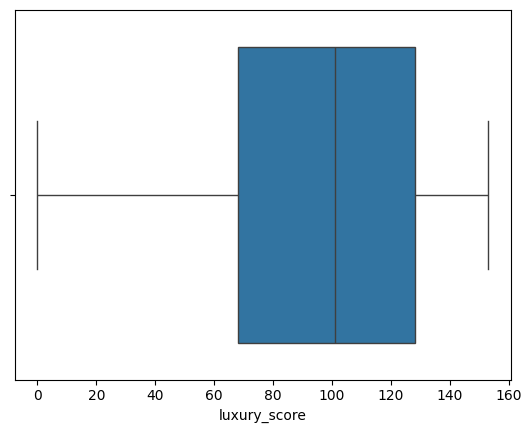

In [ ]:
sns.boxplot(data=df,x='luxury_score')

In [ ]:
def categorize_luxury(score):
    if 0 <= score < 50:
        return "Budget"
    elif 50 <= score < 100:
        return "SemiLuxury"
    elif score >= 100:
        return "Luxury"
    else:
        return None  # or "Undefined" or any other label for scores outside the defined bins

In [ ]:
train_df['luxury_category'] = train_df['luxury_score'].apply(categorize_luxury)

In [ ]:
train_df.head()

,locality,own_type,#bedroom,#balcony,furnish,facing,possesion_age,floor_num,#floors,area_in_sqft,price_in_lakh,total_landmark_count,connectivity,hospital+pharmacy,religious_places,education,banks,shoppings,office_complexes,luxury_score,area_room_ratio,luxury_category
0,Sector 84,Freehold,4.0,4.0,SemiFurnished,North,5-10 Year Old Property,14,26,3434,263.0,10.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,82.0,858.500000,SemiLuxury
1,Sector 81,Freehold,4.0,3.0,SemiFurnished,North,1-5 Year Old Property,7,29,2870,360.0,9.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,112.0,717.500000,Luxury
2,Sector 112,Freehold,3.0,3.0,SemiFurnished,East,1-5 Year Old Property,14,28,2802,385.0,8.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,89.0,934.000000,SemiLuxury
3,Sector 104,Freehold,3.0,4.0,SemiFurnished,South,1-5 Year Old Property,4,27,2290,195.0,14.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,75.0,763.333333,SemiLuxury
4,Sector 74,Freehold,2.0,3.0,UnFurnished,East,0-1 Year Old Property,12,30,1400,162.0,13.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,52.0,700.000000,SemiLuxury


# **Floor**

<Axes: xlabel='floor_num'>

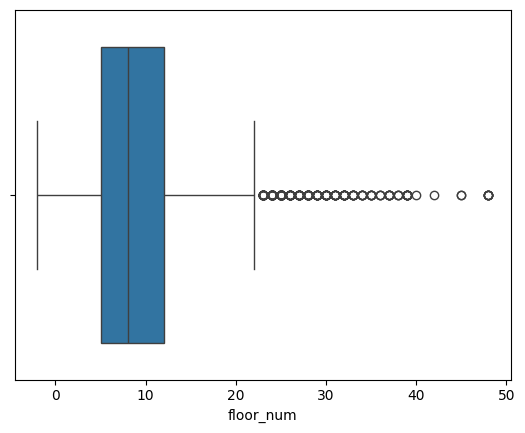

In [ ]:
sns.boxplot(data=df, x='floor_num')

In [ ]:
def categorize_floor(floor):
    if floor <= 2:
        return "Low Floor"
    elif 3 <= floor <= 10:
        return "Mid Floor"
    elif floor > 10:
        return "High Floor"
    else:
        return None  # or "Undefined" or any other label for floors outside the defined bins

In [ ]:
train_df['floor_category'] = train_df['floor_num'].apply(categorize_floor)

In [ ]:
train_df.head()

,locality,own_type,#bedroom,#balcony,furnish,facing,possesion_age,floor_num,#floors,area_in_sqft,price_in_lakh,total_landmark_count,connectivity,hospital+pharmacy,religious_places,education,banks,shoppings,office_complexes,luxury_score,area_room_ratio,luxury_category,floor_category
0,Sector 84,Freehold,4.0,4.0,SemiFurnished,North,5-10 Year Old Property,14,26,3434,263.0,10.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,82.0,858.500000,SemiLuxury,High Floor
1,Sector 81,Freehold,4.0,3.0,SemiFurnished,North,1-5 Year Old Property,7,29,2870,360.0,9.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,112.0,717.500000,Luxury,Mid Floor
2,Sector 112,Freehold,3.0,3.0,SemiFurnished,East,1-5 Year Old Property,14,28,2802,385.0,8.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,89.0,934.000000,SemiLuxury,High Floor
3,Sector 104,Freehold,3.0,4.0,SemiFurnished,South,1-5 Year Old Property,4,27,2290,195.0,14.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,75.0,763.333333,SemiLuxury,Mid Floor
4,Sector 74,Freehold,2.0,3.0,UnFurnished,East,0-1 Year Old Property,12,30,1400,162.0,13.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,52.0,700.000000,SemiLuxury,High Floor


In [ ]:
train_df.drop(columns=['floor_num','luxury_score','area_room_ratio','#floors'],inplace=True)

In [ ]:
train_df.columns

Index(['locality', 'own_type', '#bedroom', '#balcony', 'furnish', 'facing',
       'possesion_age', 'area_in_sqft', 'price_in_lakh',
       'total_landmark_count', 'connectivity', 'hospital+pharmacy',
       'religious_places', 'education', 'banks', 'shoppings',
       'office_complexes', 'luxury_category', 'floor_category'],
      dtype='object')

In [ ]:
train_df.drop(columns=['total_landmark_count'],inplace=True)

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

# Create a copy of the original data for label encoding
data_label_encoded = train_df.copy()

categorical_cols = train_df.select_dtypes(include=['object','category']).columns

# Apply label encoding to categorical columns
for col in categorical_cols:
    oe = OrdinalEncoder()
    data_label_encoded[col] = oe.fit_transform(data_label_encoded[[col]])
    print(oe.categories_)

# Splitting the dataset into training and testing sets
X_label = data_label_encoded.drop('price_in_lakh', axis=1)
y_label = data_label_encoded['price_in_lakh']

[array(['A Block Sushant Lok Phase - 3', 'Ardee City', 'Chakkarpur',
       'Civil L', 'DLF Phase 1', 'DLF Phase 2', 'DLF Phase 3',
       'DLF Phase 4', 'DLF Phase 5', 'Dayanand Colony', 'Dharam Colony',
       'Dwarka Expressway', 'Golf Course Ext Road', 'Gwal Pahari',
       'Heritage City', 'Jharsa', 'Kadarpur', 'MG Road', 'Malibu Town',
       'Nirvana Country', 'Palam Vihar', 'Sec 90', 'Sector 1 Imt Manesar',
       'Sector 102', 'Sector 103', 'Sector 104', 'Sector 106',
       'Sector 107', 'Sector 108', 'Sector 109', 'Sector 10A',
       'Sector 110', 'Sector 110 A', 'Sector 111', 'Sector 112',
       'Sector 113', 'Sector 15', 'Sector 15 Part 2',
       'Sector 1A IMT Manesar', 'Sector 2', 'Sector 22', 'Sector 28',
       'Sector 3', 'Sector 30', 'Sector 31', 'Sector 33',
       'Sector 36 Sohna', 'Sector 36A', 'Sector 37C', 'Sector 37D',
       'Sector 38', 'Sector 39', 'Sector 4', 'Sector 41', 'Sector 42',
       'Sector 43', 'Sector 45', 'Sector 47', 'Sector 48', 'Sector 49

In [ ]:
X_label.head()

,locality,own_type,#bedroom,#balcony,furnish,facing,possesion_age,area_in_sqft,connectivity,hospital+pharmacy,religious_places,education,banks,shoppings,office_complexes,luxury_category,floor_category
0,96.0,1.0,4.0,4.0,1.0,1.0,3.0,3434,0.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0
1,91.0,1.0,4.0,3.0,1.0,1.0,1.0,2870,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,2.0
2,34.0,1.0,3.0,3.0,1.0,0.0,1.0,2802,1.0,1.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0
3,25.0,1.0,3.0,4.0,1.0,4.0,1.0,2290,1.0,1.0,0.0,1.0,0.0,1.0,1.0,2.0,2.0
4,85.0,1.0,2.0,3.0,2.0,0.0,0.0,1400,1.0,1.0,0.0,1.0,0.0,1.0,1.0,2.0,0.0


<Axes: >

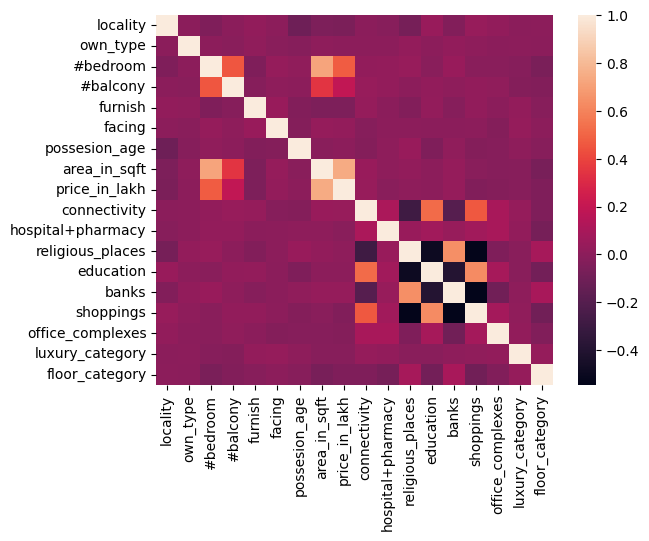

In [ ]:
 sns.heatmap(data_label_encoded.corr())

In [ ]:
fi_df1 = data_label_encoded.corr()['price_in_lakh'].iloc[0:].to_frame().reset_index().rename(columns={'index':'feature','price_in_lakh':'corr_coeff'}).sort_values(by='corr_coeff',ascending=False)
fi_df1

,feature,corr_coeff
8,price_in_lakh,1.000000
7,area_in_sqft,0.743736
2,#bedroom,0.469890
3,#balcony,0.187692
9,connectivity,0.038621
13,banks,0.029751
5,facing,0.026624
11,religious_places,0.009286
6,possesion_age,0.002338
12,education,0.000505


In [ ]:
fi_df1.drop(index=[9],inplace=True)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_label, y_label)

# Extract feature importance scores for label encoded data
fi_df2 = pd.DataFrame({
    'feature': X_label.columns,
    'rf_importance': rf_label.feature_importances_
}).sort_values(by='rf_importance', ascending=False)

fi_df2

,feature,rf_importance
7,area_in_sqft,0.795230
2,#bedroom,0.054368
0,locality,0.050544
5,facing,0.014347
3,#balcony,0.013395
6,possesion_age,0.013033
12,banks,0.011261
9,hospital+pharmacy,0.010690
15,luxury_category,0.008824
14,office_complexes,0.006854


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Train a Random Forest regressor on label encoded data
gb_label = GradientBoostingRegressor()
gb_label.fit(X_label, y_label)

# Extract feature importance scores for label encoded data
fi_df3 = pd.DataFrame({
    'feature': X_label.columns,
    'gb_importance': gb_label.feature_importances_
}).sort_values(by='gb_importance', ascending=False)

fi_df3

,feature,gb_importance
7,area_in_sqft,0.896660
2,#bedroom,0.057934
0,locality,0.021440
9,hospital+pharmacy,0.008588
3,#balcony,0.003961
6,possesion_age,0.003283
15,luxury_category,0.002577
12,banks,0.002436
14,office_complexes,0.001528
5,facing,0.000397


In [ ]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

X_train_label, X_test_label, y_train_label, y_test_label = train_test_split(X_label, y_label, test_size=0.2, random_state=42)

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_train_label, y_train_label)

# Calculate Permutation Importance
perm_importance = permutation_importance(rf_label, X_test_label, y_test_label, n_repeats=30, random_state=42)

# Organize results into a DataFrame
fi_df4 = pd.DataFrame({
    'feature': X_label.columns,
    'permutation_importance': perm_importance.importances_mean
}).sort_values(by='permutation_importance', ascending=False)

fi_df4

,feature,permutation_importance
7,area_in_sqft,1.222209
2,#bedroom,0.121281
3,#balcony,0.011475
0,locality,0.005352
15,luxury_category,0.003350
11,education,0.002839
16,floor_category,0.001883
14,office_complexes,0.001674
9,hospital+pharmacy,0.001542
5,facing,0.001034


In [ ]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_label)

# Train a LASSO regression model
# We'll use a relatively small value for alpha (the regularization strength) for demonstration purposes
lasso = Lasso(alpha=0.01, random_state=42)
lasso.fit(X_scaled, y_label)

# Extract coefficients
fi_df5 = pd.DataFrame({
    'feature': X_label.columns,
    'lasso_coeff': lasso.coef_
}).sort_values(by='lasso_coeff', ascending=False)

fi_df5

,feature,lasso_coeff
7,area_in_sqft,337.124825
8,connectivity,8.201310
11,education,7.813271
6,possesion_age,3.423629
5,facing,1.569881
12,banks,-0.615545
16,floor_category,-0.954079
1,own_type,-2.184152
15,luxury_category,-2.247641
14,office_complexes,-3.890276


In [ ]:
from sklearn.feature_selection import RFE

# Initialize the base estimator
estimator = RandomForestRegressor()

# Apply RFE on the label-encoded and standardized training data
selector_label = RFE(estimator, n_features_to_select=X_label.shape[1], step=1)
selector_label = selector_label.fit(X_label, y_label)

# Get the selected features based on RFE
selected_features = X_label.columns[selector_label.support_]

# Extract the coefficients for the selected features from the underlying linear regression model
selected_coefficients = selector_label.estimator_.feature_importances_

# Organize the results into a DataFrame
fi_df6 = pd.DataFrame({
    'feature': selected_features,
    'rfe_score': selected_coefficients
}).sort_values(by='rfe_score', ascending=False)

fi_df6

,feature,rfe_score
7,area_in_sqft,0.799311
2,#bedroom,0.055560
0,locality,0.049330
5,facing,0.016199
3,#balcony,0.013494
6,possesion_age,0.012500
12,banks,0.009542
15,luxury_category,0.009212
9,hospital+pharmacy,0.008957
16,floor_category,0.005990


In [ ]:
from sklearn.linear_model import LinearRegression # Import LinearRegression

# Train a linear regression model on the label-encoded and standardized training data
lin_reg = LinearRegression()
lin_reg.fit(X_scaled, y_label)

# Extract coefficients
fi_df7 = pd.DataFrame({
    'feature': X_label.columns,
    'reg_coeffs': lin_reg.coef_
}).sort_values(by='reg_coeffs', ascending=False)

fi_df7

,feature,reg_coeffs
7,area_in_sqft,337.157569
8,connectivity,8.217163
11,education,7.831476
6,possesion_age,3.433299
5,facing,1.580992
12,banks,-0.632403
16,floor_category,-0.964108
1,own_type,-2.193471
15,luxury_category,-2.257197
14,office_complexes,-3.900390


In [ ]:
final_fi_df = fi_df1.merge(fi_df2,on='feature').merge(fi_df3,on='feature').merge(fi_df4,on='feature').merge(fi_df5,on='feature').merge(fi_df6,on='feature').merge(fi_df7,on='feature').set_index('feature')

In [ ]:
final_fi_df

,corr_coeff,rf_importance,gb_importance,permutation_importance,lasso_coeff,rfe_score,reg_coeffs
feature,,,,,,,
area_in_sqft,0.743736,0.795230,0.896660,1.222209,337.124825,0.799311,337.157569
#bedroom,0.469890,0.054368,0.057934,0.121281,-43.558914,0.055560,-43.590872
#balcony,0.187692,0.013395,0.003961,0.011475,-21.585058,0.013494,-21.592757
banks,0.029751,0.011261,0.002436,-0.001573,-0.615545,0.009542,-0.632403
facing,0.026624,0.014347,0.000397,0.001034,1.569881,0.016199,1.580992
religious_places,0.009286,0.002533,0.000220,-0.001783,-6.884035,0.001915,-6.890576
possesion_age,0.002338,0.013033,0.003283,0.000930,3.423629,0.012500,3.433299
education,0.000505,0.002742,0.000118,0.002839,7.813271,0.002787,7.831476
own_type,-0.000413,0.000377,0.000029,-0.000039,-2.184152,0.000440,-2.193471


In [ ]:
# normalize the score
final_fi_df = final_fi_df.divide(final_fi_df.sum(axis=0), axis=1)

In [ ]:
final_fi_df

,corr_coeff,rf_importance,gb_importance,permutation_importance,lasso_coeff,rfe_score,reg_coeffs
feature,,,,,,,
area_in_sqft,0.613934,0.796394,0.896964,0.893890,1.484458,0.800317,1.485243
#bedroom,0.387881,0.054447,0.057954,0.088701,-0.191803,0.055630,-0.192026
#balcony,0.154934,0.013415,0.003962,0.008392,-0.095045,0.013511,-0.095120
banks,0.024559,0.011277,0.002437,-0.001150,-0.002710,0.009554,-0.002786
facing,0.021977,0.014368,0.000397,0.000756,0.006913,0.016219,0.006965
religious_places,0.007666,0.002536,0.000220,-0.001304,-0.030312,0.001917,-0.030354
possesion_age,0.001930,0.013052,0.003284,0.000680,0.015075,0.012516,0.015124
education,0.000416,0.002746,0.000118,0.002076,0.034404,0.002790,0.034499
own_type,-0.000341,0.000378,0.000029,-0.000029,-0.009617,0.000440,-0.009663


In [ ]:
final_fi_df[['corr_coeff','rf_importance','gb_importance','permutation_importance','rfe_score']].mean(axis=1).sort_values(ascending=False)

feature
area_in_sqft         0.800300
#bedroom             0.128923
#balcony             0.038843
locality             0.014993
facing               0.010744
banks                0.009335
possesion_age        0.006293
hospital+pharmacy    0.004360
religious_places     0.002207
luxury_category      0.001883
education            0.001629
own_type             0.000095
office_complexes    -0.002035
floor_category      -0.005389
shoppings           -0.005853
furnish             -0.006328
dtype: float64

In [ ]:
# to drop pooja room, study room, others
X_label.sample(5)

,locality,own_type,#bedroom,#balcony,furnish,facing,possesion_age,area_in_sqft,connectivity,hospital+pharmacy,religious_places,education,banks,shoppings,office_complexes,luxury_category,floor_category
6403,23.0,1.0,3.0,2.0,1.0,2.0,1.0,1550,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0
5840,112.0,1.0,3.0,3.0,1.0,1.0,0.0,1789,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
6390,95.0,1.0,3.0,4.0,1.0,0.0,4.0,3425,1.0,1.0,0.0,1.0,0.0,1.0,1.0,2.0,2.0
2532,27.0,1.0,2.0,3.0,2.0,1.0,1.0,1350,1.0,1.0,1.0,1.0,8.0,0.0,0.0,2.0,2.0
5343,70.0,1.0,2.0,1.0,1.0,5.0,4.0,900,0.0,1.0,0.0,1.0,4.0,1.0,0.0,1.0,1.0


In [ ]:
# with all the cols
from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, X_label, y_label, cv=5, scoring='r2')

In [ ]:
scores.mean()

0.7266853337299806

In [ ]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, X_label.drop(columns=['furnish','shoppings','floor_category','office_complexes','own_type']), y_label, cv=5, scoring='r2')

In [ ]:
scores.mean()

0.7339387169738301

In [ ]:
export_df = X_label.drop(columns=['furnish','shoppings','floor_category','office_complexes','own_type'])
export_df['price_in_lakh'] = y_label

In [ ]:
export_df.to_csv('/content/drive/MyDrive/pro/res_apart_gurgaon.csv', index=False)

In [ ]:
export_df.sample(10)

,locality,#bedroom,#balcony,facing,possesion_age,area_in_sqft,connectivity,hospital+pharmacy,religious_places,education,banks,luxury_category,price_in_lakh
5416,8.0,3.0,4.0,2.0,3.0,2275,1.0,1.0,0.0,1.0,0.0,1.0,140.0
5545,97.0,3.0,3.0,2.0,1.0,2588,1.0,1.0,0.0,1.0,0.0,1.0,450.0
1501,89.0,2.0,2.0,6.0,3.0,1261,0.0,1.0,1.0,0.0,0.0,1.0,170.0
2437,37.0,3.0,4.0,0.0,4.0,1811,1.0,1.0,0.0,1.0,0.0,1.0,153.0
3686,68.0,3.0,2.0,0.0,1.0,2100,1.0,1.0,0.0,1.0,0.0,1.0,250.0
4693,97.0,4.0,4.0,1.0,0.0,3800,0.0,0.0,1.0,0.0,0.0,1.0,590.0
4109,19.0,3.0,4.0,2.0,3.0,2985,1.0,1.0,0.0,1.0,0.0,2.0,550.0
6211,82.0,4.0,2.0,2.0,4.0,3250,0.0,1.0,1.0,0.0,3.0,2.0,290.0
2001,76.0,4.0,4.0,0.0,0.0,6147,1.0,1.0,0.0,1.0,0.0,2.0,2080.0
2568,73.0,3.0,3.0,2.0,0.0,1785,1.0,1.0,0.0,1.0,0.0,1.0,175.0
